Using a deep learning approach in PyTorch to create a dart scoring application involves several steps. Here’s a step-by-step guide on how you could approach this:

### 1. **Data Collection:**
   - Collect a dataset of images of dartboards with darts in different positions.
   - Label the images with the positions and scores of the darts.

### 2. **Data Preprocessing:**
   - Preprocess the images: resize, normalize, etc.
   - Split the dataset into training, validation, and test sets.

### 3. **Model Architecture:**
   - Define a model architecture suitable for object detection (e.g., Faster R-CNN, YOLO, or SSD).
   - You can use a pre-trained model on a dataset like COCO and fine-tune it on your dataset.

### 4. **Model Training:**
   - Train the model on your dataset.
   - Monitor the training process, and possibly adjust hyperparameters and augment data if needed.

### 5. **Evaluation:**
   - Evaluate the model’s performance using metrics such as mAP (mean Average Precision).
   - Perform testing on the test set to ensure the model’s generalization.

### 6. **Scoring Algorithm:**
   - Develop an algorithm to convert detected dart positions into scores.
   - This might involve converting pixel coordinates to polar coordinates and determining which segment of the dartboard the dart landed in.

### 7. **Integration and Deployment:**
   - Integrate the trained model and scoring algorithm into your application.
   - Deploy the application, ensuring all dependencies are correctly set up.

### 8. **Testing and Optimization:**
   - Test the complete system thoroughly.
   - Optimize for performance, ensuring real-time processing if needed.

### Libraries and Tools:
- **PyTorch**: For defining, training, and evaluating the deep learning model.
- **Torchvision**: Provides pre-trained models and datasets, which can be used for transfer learning.
- **OpenCV**: For image processing and manipulation.
- **NumPy**: For numerical operations.

### Example Code Snippet:
Below is a simplified example code snippet demonstrating how you can load a pre-trained Faster R-CNN model in PyTorch and modify it for your task:

```python
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)

# Modify the number of output classes (assuming you have defined num_classes based on your dataset)
num_classes = 21  # 20 classes for the dartboard segments + 1 background class
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Move the model to the appropriate device
model.to(device)

# Define your training loop, loss function, optimizer, etc., and train the model on your dataset
```

This is a simplified example to give you a starting point. You need to define the training loop, load your dataset, preprocess the data, define the loss function and optimizer, etc., to train the model on your dataset. The official [PyTorch documentation](https://pytorch.org/tutorials/) and [Torchvision object detection finetuning tutorial](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) are excellent resources to get started.

Remember, building a deep learning model for a specific task like this can be challenging, and you may need to iterate on your approach, experiment with different models, and possibly collect more data to achieve good results.

In [44]:
import matplotlib.pyplot as plt
from darts import get_image_and_labels

In [46]:
image, points = get_image_and_labels('IMG_7889.json')

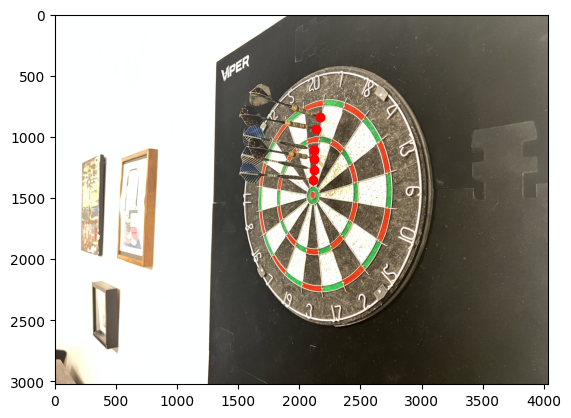

In [47]:
plt.imshow(image)
for x, y in points:
    plt.scatter(x, y, c='red')
plt.show()

In [2]:
import torch
import cv2
from torchvision import transforms
from PIL import Image

: 

In [1]:

# Load the image
image_path = 'IMG_7890.jpg'
image = Image.open(image_path)



NameError: name 'Image' is not defined

In [ ]:

# Preprocess the image
input_size = 416  # Typically YOLO models take input images of this size
preprocess = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
])
input_image = preprocess(image).unsqueeze(0)

# Load the pretrained YOLO model
# Here it is assumed that you have a way to load the YOLO model
# This can be done using PyTorch Hub or a custom implementation from GitHub
model = ...  # Load YOLO model

# Perform inference
with torch.no_grad():
    output = model(input_image)

# Post-process the output
# The output structure depends on the specific YOLO implementation
# Typically, you would apply a threshold on the objectness score and filter by class
for box, score, class_id in output:
    if class_id == ...:  # The ID for the dart class in your model
        if score > 0.5:  # Confidence threshold
            # The box variable should contain the bounding box coordinates
            # You can draw this box on the original image to visualize the detected dart
